<a href="https://colab.research.google.com/github/zhijunm/Text_Mining/blob/master/Sentiment_Analysis_Airbnb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
## import NLTK libraries
import nltk
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger') 

!pip install -q wordcloud
from pprint import pprint
import csv
from typing import List
import re
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


In [ ]:
# Load dataset
from google.colab import files
uploaded = files.upload()

Saving ReviewUpdated.xlsx to ReviewUpdated.xlsx


In [ ]:
import io
review=pd.read_excel(io.BytesIO(uploaded['ReviewUpdated.xlsx']))
review

,listing_id,id,date,reviewer_id,reviewer_name,comments,name_of_property,summary,neighborhood_overview,transit,host_name,host_response_time,neighbourhood_group_cleansed,zipcode,property_type,room_type,bathrooms,bedrooms,beds,bed_type,amenities,price,number_of_reviews,cancellation_policy,review_scores_rating,review_scores_value
0,7202016,38917982,2015-07-19,28943674,Bianca,Cute and cozy place. Perfect location to every...,Cute Mid Century near Downtown,Cute mid century condo within walking distance...,"Neighborhood has everything. Coffee, restaura...",Free on street parking (you are close to all m...,Kelly,within an hour,Queen Anne,98119.0,Apartment,Private room,1.0,1.0,1,Pull-out Sofa,"{Internet,""Wireless Internet"",Kitchen,Heating,...",75,16,flexible,95.0,10.0
1,7202016,39087409,2015-07-20,32440555,Frank,Kelly has a great room in a very central locat...,Cute Mid Century near Downtown,Cute mid century condo within walking distance...,"Neighborhood has everything. Coffee, restaura...",Free on street parking (you are close to all m...,Kelly,within an hour,Queen Anne,98119.0,Apartment,Private room,1.0,1.0,1,Pull-out Sofa,"{Internet,""Wireless Internet"",Kitchen,Heating,...",75,16,flexible,95.0,10.0
2,7202016,39820030,2015-07-26,37722850,Ian,"Very spacious apartment, and in a great neighb...",Cute Mid Century near Downtown,Cute mid century condo within walking distance...,"Neighborhood has everything. Coffee, restaura...",Free on street parking (you are close to all m...,Kelly,within an hour,Queen Anne,98119.0,Apartment,Private room,1.0,1.0,1,Pull-out Sofa,"{Internet,""Wireless Internet"",Kitchen,Heating,...",75,16,flexible,95.0,10.0
3,7202016,40813543,2015-08-02,33671805,George,Close to Seattle Center and all it has to offe...,Cute Mid Century near Downtown,Cute mid century condo within walking distance...,"Neighborhood has everything. Coffee, restaura...",Free on street parking (you are close to all m...,Kelly,within an hour,Queen Anne,98119.0,Apartment,Private room,1.0,1.0,1,Pull-out Sofa,"{Internet,""Wireless Internet"",Kitchen,Heating,...",75,16,flexible,95.0,10.0
4,7202016,41986501,2015-08-10,34959538,Ming,Kelly was a great host and very accommodating ...,Cute Mid Century near Downtown,Cute mid century condo within walking distance...,"Neighborhood has everything. Coffee, restaura...",Free on street parking (you are close to all m...,Kelly,within an hour,Queen Anne,98119.0,Apartment,Private room,1.0,1.0,1,Pull-out Sofa,"{Internet,""Wireless Internet"",Kitchen,Heating,...",75,16,flexible,95.0,10.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
84844,3624990,50436321,2015-10-12,37419458,Ryan,The description and pictures of the apartment ...,Large Downtown 2 Bedroom Condo,"Seattle Suites, LLC manages privately owned fu...","The Pike/Pine Corridor, recently call ""Sesame ...",Getting around downtown is a breeze. Most thin...,Rebecca,within an hour,Downtown,98101.0,Apartment,Entire home/apt,1.0,2.0,4,Real Bed,"{TV,""Cable TV"",Internet,""Wireless Internet"",""A...",175,18,moderate,90.0,9.0
84845,3624990,51024875,2015-10-17,6933252,Linda,We had an excellent stay. It was clean and com...,Large Downtown 2 Bedroom Condo,"Seattle Suites, LLC manages privately owned fu...","The Pike/Pine Corridor, recently call ""Sesame ...",Getting around downtown is a breeze. Most thin...,Rebecca,within an hour,Downtown,98101.0,Apartment,Entire home/apt,1.0,2.0,4,Real Bed,"{TV,""Cable TV"",Internet,""Wireless Internet"",""A...",175,18,moderate,90.0,9.0
84846,3624990,51511988,2015-10-20,19543701,Jaime,"Gran ubicaci√≥n, cerca de todo lo atractivo de...",Large Downtown 2 Bedroom Condo,"Seattle Suites, LLC manages privately owned fu...","The Pike/Pine Corridor, recently call ""Sesame ...",Getting around downtown is a breeze. Most thin...,Rebecca,within an hour,Downtown,98101.0,Apartment,Entire home/apt,1.0,2.0,4,Real Bed,"{TV,""Cable TV"",Internet,""Wireless Internet"",""A...",175,18,moderate,9

In [ ]:
# Overview of dataset
review = pd.read_excel("ReviewUpdated.xlsx")
review

,listing_id,id,date,reviewer_id,reviewer_name,comments,name_of_property,summary,neighborhood_overview,transit,host_name,host_response_time,neighbourhood_group_cleansed,zipcode,property_type,room_type,bathrooms,bedrooms,beds,bed_type,amenities,price,number_of_reviews,cancellation_policy,review_scores_rating,review_scores_value
0,7202016,38917982,2015-07-19,28943674,Bianca,Cute and cozy place. Perfect location to every...,Cute Mid Century near Downtown,Cute mid century condo within walking distance...,"Neighborhood has everything. Coffee, restaura...",Free on street parking (you are close to all m...,Kelly,within an hour,Queen Anne,98119.0,Apartment,Private room,1.0,1.0,1,Pull-out Sofa,"{Internet,""Wireless Internet"",Kitchen,Heating,...",75,16,flexible,95.0,10.0
1,7202016,39087409,2015-07-20,32440555,Frank,Kelly has a great room in a very central locat...,Cute Mid Century near Downtown,Cute mid century condo within walking distance...,"Neighborhood has everything. Coffee, restaura...",Free on street parking (you are close to all m...,Kelly,within an hour,Queen Anne,98119.0,Apartment,Private room,1.0,1.0,1,Pull-out Sofa,"{Internet,""Wireless Internet"",Kitchen,Heating,...",75,16,flexible,95.0,10.0
2,7202016,39820030,2015-07-26,37722850,Ian,"Very spacious apartment, and in a great neighb...",Cute Mid Century near Downtown,Cute mid century condo within walking distance...,"Neighborhood has everything. Coffee, restaura...",Free on street parking (you are close to all m...,Kelly,within an hour,Queen Anne,98119.0,Apartment,Private room,1.0,1.0,1,Pull-out Sofa,"{Internet,""Wireless Internet"",Kitchen,Heating,...",75,16,flexible,95.0,10.0
3,7202016,40813543,2015-08-02,33671805,George,Close to Seattle Center and all it has to offe...,Cute Mid Century near Downtown,Cute mid century condo within walking distance...,"Neighborhood has everything. Coffee, restaura...",Free on street parking (you are close to all m...,Kelly,within an hour,Queen Anne,98119.0,Apartment,Private room,1.0,1.0,1,Pull-out Sofa,"{Internet,""Wireless Internet"",Kitchen,Heating,...",75,16,flexible,95.0,10.0
4,7202016,41986501,2015-08-10,34959538,Ming,Kelly was a great host and very accommodating ...,Cute Mid Century near Downtown,Cute mid century condo within walking distance...,"Neighborhood has everything. Coffee, restaura...",Free on street parking (you are close to all m...,Kelly,within an hour,Queen Anne,98119.0,Apartment,Private room,1.0,1.0,1,Pull-out Sofa,"{Internet,""Wireless Internet"",Kitchen,Heating,...",75,16,flexible,95.0,10.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
84844,3624990,50436321,2015-10-12,37419458,Ryan,The description and pictures of the apartment ...,Large Downtown 2 Bedroom Condo,"Seattle Suites, LLC manages privately owned fu...","The Pike/Pine Corridor, recently call ""Sesame ...",Getting around downtown is a breeze. Most thin...,Rebecca,within an hour,Downtown,98101.0,Apartment,Entire home/apt,1.0,2.0,4,Real Bed,"{TV,""Cable TV"",Internet,""Wireless Internet"",""A...",175,18,moderate,90.0,9.0
84845,3624990,51024875,2015-10-17,6933252,Linda,We had an excellent stay. It was clean and com...,Large Downtown 2 Bedroom Condo,"Seattle Suites, LLC manages privately owned fu...","The Pike/Pine Corridor, recently call ""Sesame ...",Getting around downtown is a breeze. Most thin...,Rebecca,within an hour,Downtown,98101.0,Apartment,Entire home/apt,1.0,2.0,4,Real Bed,"{TV,""Cable TV"",Internet,""Wireless Internet"",""A...",175,18,moderate,90.0,9.0
84846,3624990,51511988,2015-10-20,19543701,Jaime,"Gran ubicaci√≥n, cerca de todo lo atractivo de...",Large Downtown 2 Bedroom Condo,"Seattle Suites, LLC manages privately owned fu...","The Pike/Pine Corridor, recently call ""Sesame ...",Getting around downtown is a breeze. Most thin...,Rebecca,within an hour,Downtown,98101.0,Apartment,Entire home/apt,1.0,2.0,4,Real Bed,"{TV,""Cable TV"",Internet,""Wireless Internet"",""A...",175,18,moderate,9

In [ ]:
# Total characters in Review 
review.shape

(84849, 26)

In [ ]:
# Check missing values in 'comments' (Pandas will recognize both empty cells and NA types as missing values)
print(review['comments'].isnull())
sum(review['comments'].isnull())
# Check missing values in all
print(review.isnull().sum())

0        False
1        False
2        False
3        False
4        False
         ...  
84844    False
84845    False
84846    False
84847    False
84848    False
Name: comments, Length: 84849, dtype: bool
listing_id                          0
id                                  0
date                                0
reviewer_id                         0
reviewer_name                       0
comments                           19
name_of_property                    0
summary                          9014
neighborhood_overview           18415
transit                         14729
host_name                           0
host_response_time               3639
neighbourhood_group_cleansed        0
zipcode                           213
property_type                       0
room_type                           0
bathrooms                         609
bedrooms                          290
beds                                0
bed_type                            0
amenities                       

In [ ]:
# replace bathrooms and bedrooms with median
median1 = review['bathrooms'].median()
review['bathrooms'].fillna(median1, inplace=True)
median2 = review['bedrooms'].median()
review['bedrooms'].fillna(median2, inplace=True)
print(review.isnull().sum())

listing_id                          0
id                                  0
date                                0
reviewer_id                         0
reviewer_name                       0
comments                           19
name_of_property                    0
summary                          9014
neighborhood_overview           18415
transit                         14729
host_name                           0
host_response_time               3639
neighbourhood_group_cleansed        0
zipcode                           213
property_type                       0
room_type                           0
bathrooms                           0
bedrooms                            0
beds                                0
bed_type                            0
amenities                           0
price                               0
number_of_reviews                   0
cancellation_policy                 0
review_scores_rating               20
review_scores_value                32
dtype: int64

In [ ]:
# Subset review (drop nerighborhood_overview,transit, host_response_time and zipcode + review_scores_rating)
review = review[["listing_id","id","date","reviewer_id","comments","neighbourhood_group_cleansed","property_type","bathrooms","bedrooms","beds","bed_type","amenities","price","number_of_reviews","cancellation_policy","review_scores_rating"]]
review
print(review.isnull().sum())

listing_id                       0
id                               0
date                             0
reviewer_id                      0
comments                        19
neighbourhood_group_cleansed     0
property_type                    0
bathrooms                        0
bedrooms                         0
beds                             0
bed_type                         0
amenities                        0
price                            0
number_of_reviews                0
cancellation_policy              0
review_scores_rating            20
dtype: int64


In [ ]:
# Remove NAs 
review = review.dropna()
review.shape

(84810, 16)

In [ ]:
print(review.isnull().sum())

listing_id                      0
id                              0
date                            0
reviewer_id                     0
comments                        0
neighbourhood_group_cleansed    0
property_type                   0
bathrooms                       0
bedrooms                        0
beds                            0
bed_type                        0
amenities                       0
price                           0
number_of_reviews               0
cancellation_policy             0
review_scores_rating            0
dtype: int64


In [ ]:
print(review['comments'].head())

0    Cute and cozy place. Perfect location to every...
1    Kelly has a great room in a very central locat...
2    Very spacious apartment, and in a great neighb...
3    Close to Seattle Center and all it has to offe...
4    Kelly was a great host and very accommodating ...
Name: comments, dtype: object


TOKENIZATION + REMOVE STOPWORDS

In [ ]:
#Tokenization of text
from nltk.tokenize import word_tokenize,sent_tokenize

from typing import List

In [ ]:
#remove stop-words
from nltk.corpus import stopwords # library 
nltk.download('stopwords')
# set the language 
all_stopwords = set(stopwords.words('english')) 

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
def preprocess_text(text: str) -> List[str]:
    # Looking at the text we see that almost no special HTML tags.
    # A sentence (atleast well structured) often has a full spot at the end. We use these two for word breaks
    pattern1 = re.compile("\!|\.")
    lines = re.split(pattern1, text)
    # you can break a sentence into words using whitespace based split
    tokens = []
    for line in lines:
        tokens += line.split(" ")

    # lowercase and remove any non-alphanumeric characters from tokens for normalize
    normalized_tokens = [re.sub(r"\W+", "", token.lower()) for token in tokens]
    return  " ".join([
            token
            for token in normalized_tokens
            if token and token not in all_stopwords and len(tokens) > 1 
        ])
    

In [ ]:
# Test a sentence for preprocess_text function
custom_review = "I hated the film. It was a disaster. Poor direction, bad acting."
custom_review_tokens = preprocess_text(custom_review)
print(custom_review_tokens)

hated film disaster poor direction bad acting


In [ ]:
#apply preprocessing to review data
review["comments"] = review["comments"].apply(preprocess_text)
print(review["comments"])

0              cute cozy place perfect location everything
1        kelly great room central location beautiful bu...
2        spacious apartment great neighborhood kind apa...
3        close seattle center offer ballet theater muse...
4        kelly great host accommodating great neighborh...
                               ...                        
84844    description pictures apartment exactly receive...
84845    excellent stay clean comfortable convenient co...
84846    gran ubicacin cerca de todo lo atractivo del c...
84847    good apartement clean well sized situated next...
84848    breanne great host check easy let right schedu...
Name: comments, Length: 84810, dtype: object


STEMMING

In [ ]:
## stemming
from nltk.stem import PorterStemmer
ps = PorterStemmer()
from nltk.stem import LancasterStemmer
ls = LancasterStemmer()
# Snowball Stemmer is an improved version of the Porter stemmer. This method is highly precise over large data-sets.
from nltk.stem.snowball import SnowballStemmer
sn = SnowballStemmer("english")

In [ ]:
# stem function with porter stemmer
def stem_ps(sentence):
    tokens = sentence.split()
    stemmed_tokens = [ps.stem(token) for token in tokens]
    return ' '.join(stemmed_tokens)

# stem function with snowball stemmer
def stem_sn(sentence):
    tokens = sentence.split()
    stemmed_tokens = [sn.stem(token) for token in tokens]
    return ' '.join(stemmed_tokens)

review['stem_ps'] = review['comments'].apply(stem_ps)
review['stem_sn'] = review['comments'].apply(stem_sn)
review

# df['stemmed_sn'] = df['comments'].apply(sn.stem) 
# df["stemmed_pt"] = df['comments'].apply(ps.stem)

,listing_id,id,date,reviewer_id,comments,neighbourhood_group_cleansed,property_type,bathrooms,bedrooms,beds,bed_type,amenities,price,number_of_reviews,cancellation_policy,review_scores_rating,stem_ps,stem_sn
0,7202016,38917982,2015-07-19,28943674,cute cozy place perfect location everything,Queen Anne,Apartment,1.0,1.0,1,Pull-out Sofa,"{Internet,""Wireless Internet"",Kitchen,Heating,...",75,16,flexible,95.0,cute cozi place perfect locat everyth,cute cozi place perfect locat everyth
1,7202016,39087409,2015-07-20,32440555,kelly great room central location beautiful bu...,Queen Anne,Apartment,1.0,1.0,1,Pull-out Sofa,"{Internet,""Wireless Internet"",Kitchen,Heating,...",75,16,flexible,95.0,kelli great room central locat beauti build ar...,kelli great room central locat beauti build ar...
2,7202016,39820030,2015-07-26,37722850,spacious apartment great neighborhood kind apa...,Queen Anne,Apartment,1.0,1.0,1,Pull-out Sofa,"{Internet,""Wireless Internet"",Kitchen,Heating,...",75,16,flexible,95.0,spaciou apart great neighborhood kind apart wi...,spacious apart great neighborhood kind apart w...
3,7202016,40813543,2015-08-02,33671805,close seattle center offer ballet theater muse...,Queen Anne,Apartment,1.0,1.0,1,Pull-out Sofa,"{Internet,""Wireless Internet"",Kitchen,Heating,...",75,16,flexible,95.0,close seattl center offer ballet theater museu...,close seattl center offer ballet theater museu...
4,7202016,41986501,2015-08-10,34959538,kelly great host accommodating great neighborh...,Queen Anne,Apartment,1.0,1.0,1,Pull-out Sofa,"{Internet,""Wireless Internet"",Kitchen,Heating,...",75,16,flexible,95.0,kelli great host accommod great neighborhood g...,kelli great host accommod great neighborhood g...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
84844,3624990,50436321,2015-10-12,37419458,description pictures apartment exactly receive...,Downtown,Apartment,1.0,2.0,4,Real Bed,"{TV,""Cable TV"",Internet,""Wireless Internet"",""A...",175,18,moderate,90.0,descript pictur apart exactli receiv moreov pl...,descript pictur apart exact receiv moreov plac...
84845,3624990,51024875,2015-10-17,6933252,excellent stay clean comfortable convenient co...,Downtown,Apartment,1.0,2.0,4,Real Bed,"{TV,""Cable TV"",Internet,""Wireless Internet"",""A...",175,18,moderate,90.0,excel stay clean comfort conveni convent cente...,excel stay clean comfort conveni convent cente...
84846,3624990,51511988,2015-10-20,19543701,gran ubicacin cerca de todo lo atractivo del c...,Downtown,Apartment,1.0,2.0,4,Real Bed,"{TV,""Cable TV"",Internet,""Wireless Internet"",""A...",175,18,moderate,90.0,gran ubicacin cerca de todo lo atractivo del c...,gran ubicacin cerca de todo lo atractivo del c...
84847,3624990,52814482,2015-11-02,24445024,good apartement clean well sized situated next...,Downtown,Apartment,1.0,2.0,4,Real Bed,"{TV,""Cable TV"",Internet,""Wireless Internet"",""A...",175,18,moderate,90.0,good apart clean well size situat next convens...,good apart clean well size situat next convens...


In [ ]:
print(review['stem_sn'])

0                    cute cozi place perfect locat everyth
1        kelli great room central locat beauti build ar...
2        spacious apart great neighborhood kind apart w...
3        close seattl center offer ballet theater museu...
4        kelli great host accommod great neighborhood g...
                               ...                        
84844    descript pictur apart exact receiv moreov plac...
84845    excel stay clean comfort conveni convent cente...
84846    gran ubicacin cerca de todo lo atractivo del c...
84847    good apart clean well size situat next convens...
84848    breann great host check easi let right schedul...
Name: stem_sn, Length: 84810, dtype: object


CREATE A SENTIMENT COLUMN FOR 'COMMENTS' based on review scores

In [ ]:
import numpy as np
print(np.mean(review['review_scores_rating']))
print(np.median(review['review_scores_rating']))

94.89656880084895
96.0


In [ ]:

def sentiments(r : float) -> List[str]:
    #r=float(rating)
    if (r  > 95):
        return "Amazing"
    elif (r>90 and r<=95):
        return "Regular"
    elif (r <= 90):
        return "Below Average"

In [ ]:
def sentiments(r : float) -> List[str]:
    #r=float(rating)
    if (r  > 95):
        return "Amazing"
    elif (r <= 95):
        return "Regular"

In [ ]:
review['senti_classify'] = review['review_scores_rating'].apply(sentiments)
review['senti_classify'].value_counts()

Amazing          44820
Regular          30458
Below Average     9532
Name: senti_classify, dtype: int64

In [ ]:
review['senti_classify']

0              Regular
1              Regular
2              Regular
3              Regular
4              Regular
             ...      
84844    Below Average
84845    Below Average
84846    Below Average
84847    Below Average
84848          Amazing
Name: senti_classify, Length: 84810, dtype: object

In [ ]:
len(review)

84810

In [ ]:
# make sure comments as the correct type
review.comments=review.comments.astype(str)

In [ ]:
# Split dataset in 2 sets
from sklearn.model_selection import train_test_split
Train, Test = train_test_split(review, test_size = 0.2, random_state = 1)
print(Train)
print(Test)

       listing_id  ...  senti_classify
69744     1090449  ...         Regular
23844     6674408  ...         Amazing
47532     2605975  ...   Below Average
50222      258571  ...   Below Average
6609      5308875  ...         Regular
...           ...  ...             ...
21450     3884851  ...         Amazing
73382     7718139  ...         Amazing
50078      258571  ...   Below Average
5192      5272327  ...         Amazing
77744     5873892  ...   Below Average

[67848 rows x 19 columns]
       listing_id  ...  senti_classify
14966     7872980  ...         Amazing
69612      430610  ...         Amazing
20056      902609  ...         Regular
45207     1009838  ...   Below Average
75103      841049  ...         Regular
...           ...  ...             ...
63503     2525172  ...         Amazing
76122     5751177  ...         Regular
79598     6278361  ...         Amazing
28366     2737038  ...         Amazing
63475     2525172  ...         Amazing

[16962 rows x 19 columns]


In [ ]:
# Split dataset into 3 sets, comments column
np.random.seed(121)
train, validate, test = np.split(review['comments'].sample(frac=1), [int(.6*len(review)), int(.8*len(review))])
print(train)
print(validate)
print(test)
print(train.shape)
print(validate.shape)
print(test.shape)

40285    view even better photos frank welcomed us warm...
47200    angelas cozy place wonderful view perfect need...
76734    z genuine accommodating thoughtful host everyt...
9264     wish could first review lisas delightful place...
28197    mapple creek house ideally located quiet frien...
                               ...                        
9445     katrina awesome host made feel welcome wonderf...
57027    j great host place wonderful private clean ide...
29551    beth extremely nice gathered wise brief conver...
72314    pleasant trip seattle staying amy joeys place ...
18309    apartment really cool yes ceilings low really ...
Name: comments, Length: 50886, dtype: object
13998    annas place everything needed location perfect...
62593    great place stay seattle location super conven...
72712    terrys home beautiful everything needed comfor...
66863    last minute booking zacharys place due sudden ...
79420    davids home extremely clean comfortable left s...
           

In [ ]:
# Split 'stem_sn' column into 3 sets
np.random.seed(121)
train_sn, validate_sn, test_sn = np.split(review['stem_sn'].sample(frac=1), [int(.6*len(review)), int(.8*len(review))])
print(train_sn)
print(validate_sn)
print(test_sn)
print(train_sn.shape)
print(validate_sn.shape)
print(test_sn.shape)

40285    view even better photo frank welcom us warm pl...
47200    angela cozi place wonder view perfect need pla...
76734    z genuin accommod thought host everyth great a...
9264     wish could first review lisa delight place rav...
28197    mappl creek hous ideal locat quiet friend neig...
                               ...                        
9445     katrina awesom host made feel welcom wonder cl...
57027    j great host place wonder privat clean ideal l...
29551    beth extrem nice gather wise brief convers pla...
72314    pleasant trip seattl stay ami joey place made ...
18309    apart realli cool yes ceil low realli wasnt bi...
Name: stem_sn, Length: 50886, dtype: object
13998    anna place everyth need locat perfect commut d...
62593    great place stay seattl locat super conveni ca...
72712    terri home beauti everyth need comfort stay lo...
66863    last minut book zachari place due sudden trave...
79420    david home extrem clean comfort left sticki no...
            

In [ ]:
# Split sentiment_data into 3 sets
np.random.seed(121)
train_s, validate_s, test_s = np.split(review['senti_classify'].sample(frac=1), [int(.6*len(review)), int(.8*len(review))])
print(train_s)
print(validate_s)
print(test_s)
print(train_s.shape)
print(validate_s.shape)
print(test_s.shape)

40285    Amazing
47200    Amazing
76734    Regular
9264     Amazing
28197    Regular
          ...   
9445     Amazing
57027    Amazing
29551    Amazing
72314    Regular
18309    Regular
Name: senti_classify, Length: 50886, dtype: object
13998    Regular
62593    Regular
72712    Regular
66863    Regular
79420    Regular
          ...   
58880    Amazing
17649    Amazing
43238    Regular
54581    Amazing
81801    Regular
Name: senti_classify, Length: 16962, dtype: object
13811    Amazing
79576    Amazing
46894    Amazing
53211    Amazing
11974    Regular
          ...   
30768    Amazing
36367    Regular
51286    Amazing
56608    Amazing
11589    Regular
Name: senti_classify, Length: 16962, dtype: object
(50886,)
(16962,)
(16962,)


In [ ]:
# CountVectorizer implements both tokenization and occurrence counting in a single class. Read more here https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html
# You can also reuse the from scratch code we learnt in previous class
# TfidfVectorizer Convert a collection of raw documents to a matrix of TF-IDF features. 
# Unlike Tfidfvectorizer, with Tfidftransformer you will systematically compute word counts using CountVectorizer and then compute the IDF values and only then compute the Tf-idf scores.
# If you need the term frequency (term count) vectors for different tasks, use Tfidftransformer. If you need to compute tf-idf scores on documents within your “training” dataset, use Tfidfvectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
#Count vectorizer with 
#lower_count_thr = 100 # rare words/tokens
#upper_count_thr = 5000 # frequent/common tokens

tv=TfidfVectorizer(binary=False,ngram_range=(1,1))
#transformed train reviews
tv_train=tv.fit_transform(train)
#transformed test reviews
tv_test=tv.transform(test)
#transformed validation reviews
tv_validate=tv.transform(validate)

print('BOW_cv_train:',tv_train.shape)
print('BOW_cv_test:',tv_test.shape)
print('BOW_cv_blind:',tv_validate.shape)
print(tv_train)

BOW_cv_train: (50886, 39089)
BOW_cv_test: (16962, 39089)
BOW_cv_blind: (16962, 39089)
  (0, 29516)	0.07263063483901905
  (0, 12346)	0.177887421649669
  (0, 3912)	0.1994805502315625
  (0, 4102)	0.11675025876088017
  (0, 11594)	0.14763554791356387
  (0, 28651)	0.09509145418731012
  (0, 12591)	0.209542309753826
  (0, 20024)	0.1245673473184624
  (0, 31789)	0.06363831674517974
  (0, 16535)	0.17269602455706845
  (0, 26260)	0.16125273512246166
  (0, 30284)	0.1651594470770235
  (0, 14724)	0.11361922364944117
  (0, 4147)	0.11116879966079835
  (0, 7561)	0.15050344364136395
  (0, 34231)	0.2120725775812984
  (0, 7152)	0.10958130180934453
  (0, 21936)	0.2490507986974485
  (0, 37234)	0.08305782249867691
  (0, 24175)	0.2193050534202302
  (0, 34406)	0.13662665758816492
  (0, 34314)	0.3402127073321578
  (0, 1455)	0.21449237975768273
  (0, 14787)	0.15202777139883997
  (0, 1595)	0.20034906249326362
  :	:
  (50885, 20483)	0.23564943303936445
  (50885, 9214)	0.20604787675265016
  (50885, 25527)	0.254587788

In [ ]:
first_comment = tv_train[0]
df = pd.DataFrame(first_comment.T.todense(),index=tv.get_feature_names(), columns = ["tfidf"])
df.sort_values(by=["tfidf"], ascending=False)

,tfidf
treasures,0.340213
frank,0.282867
missed,0.249051
warmly,0.235497
otherwise,0.219305
...,...
firmly,0.000000
firmness,0.000000
firs,0.000000
first,0.000000


In [ ]:
# Apply CountVectorizer on stem_sn
from sklearn.feature_extraction.text import TfidfVectorizer
#Count vectorizer with 
#lower_count_thr = 100 # rare words/tokens
#upper_count_thr = 5000 # frequent/common tokens

tv=TfidfVectorizer(binary=False,ngram_range=(1,1))
#transformed train reviews
tv_train_sn=tv.fit_transform(train_sn)
#transformed test reviews
tv_test_sn=tv.transform(test_sn)
#transformed validation reviews
tv_validate_sn=tv.transform(validate_sn)

print('BOW_cv_train_sn:',tv_train_sn.shape)
print('BOW_cv_test_sn:',tv_test_sn.shape)
print('BOW_cv_blind_sn:',tv_validate_sn.shape)
print(tv_train_sn)

BOW_cv_train_sn: (50886, 29863)
BOW_cv_test_sn: (16962, 29863)
BOW_cv_blind_sn: (16962, 29863)
  (0, 22109)	0.07906940364119398
  (0, 9263)	0.16818085142465392
  (0, 3120)	0.21051611743013735
  (0, 3272)	0.12376192966118228
  (0, 8716)	0.16164922109780133
  (0, 21462)	0.10221636274193277
  (0, 9426)	0.21283094585295353
  (0, 15046)	0.1363732888114923
  (0, 23796)	0.06202338744311419
  (0, 12475)	0.18901976598368828
  (0, 19829)	0.17655896158354134
  (0, 22675)	0.17795984638948464
  (0, 11046)	0.12383422356372496
  (0, 3305)	0.11459270468169265
  (0, 5824)	0.1647151268475399
  (0, 25632)	0.17540002651697573
  (0, 5578)	0.11887097655147234
  (0, 16492)	0.22260532431572533
  (0, 28072)	0.09094173119370419
  (0, 18311)	0.24012164799867244
  (0, 25754)	0.14673228876880792
  (0, 25688)	0.3246369149919453
  (0, 1261)	0.22613411907685
  (0, 11100)	0.166458357618892
  (0, 1352)	0.21637315694559625
  :	:
  (50885, 6985)	0.20979936558515053
  (50885, 19306)	0.2602959164296792
  (50885, 4919)	0.23

LOGISTIC REGRESSION (comments) -not perfect for multiclasses, so we will skip this model 

In [ ]:
from sklearn.linear_model import LogisticRegression,SGDClassifier
#training Logistic model
lr=LogisticRegression(penalty='l2',max_iter=500,C=1,random_state=42)
#Fitting the model for tfidf features
lr_tfidf=lr.fit(tv_train,train_s)
print(lr_tfidf)

LogisticRegression(C=1, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=500,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=42, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)


In [ ]:
# Predicting the model for test set
lr_tfidf_predict_test=lr.predict(tv_test)
print(lr_tfidf_predict_test)

['Amazing' 'Regular' 'Amazing' ... 'Regular' 'Amazing' 'Regular']


In [ ]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
lr_tfidf_score=accuracy_score(test_s,lr_tfidf_predict_test)
print("lr_tfidf_score :",lr_tfidf_score)

#Classification report for tfidf features
lr_tfidf_report_test=classification_report(test_s,lr_tfidf_predict_test,target_names=['Positive','Negative'])
print(lr_tfidf_report_test)

lr_tfidf_score : 0.7587548638132295
              precision    recall  f1-score   support

    Positive       0.77      0.78      0.77      9001
    Negative       0.75      0.73      0.74      7961

    accuracy                           0.76     16962
   macro avg       0.76      0.76      0.76     16962
weighted avg       0.76      0.76      0.76     16962



LOGISTIC REGRESSION (stem_sn) -not perfect for multiclasses, so we will skip this model 



In [ ]:
from sklearn.linear_model import LogisticRegression,SGDClassifier
#training Logistic model
lr=LogisticRegression(penalty='l2',max_iter=500,C=1,random_state=42)
#Fitting the model for tfidf features
lr_tfidf_sn=lr.fit(tv_train_sn,train_s)
print(lr_tfidf_sn)

LogisticRegression(C=1, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=500,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=42, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)


In [ ]:
# Predicting the model for test set
lr_tfidf_predict_test_sn=lr.predict(tv_test_sn)
print(lr_tfidf_predict_test_sn)

['Amazing' 'Regular' 'Amazing' ... 'Regular' 'Amazing' 'Regular']


In [ ]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
lr_tfidf_score_sn=accuracy_score(test_s,lr_tfidf_predict_test_sn)
print("lr_tfidf_score_sn :",lr_tfidf_score_sn)

#Classification report for tfidf features
lr_tfidf_report_test_sn=classification_report(test_s,lr_tfidf_predict_test_sn,target_names=['Positive','Negative'])
print(lr_tfidf_report_test_sn)

lr_tfidf_score_sn : 0.7655347246786935
              precision    recall  f1-score   support

    Positive       0.78      0.78      0.78      9001
    Negative       0.75      0.74      0.75      7961

    accuracy                           0.77     16962
   macro avg       0.76      0.76      0.76     16962
weighted avg       0.77      0.77      0.77     16962



NAIVE BAYES (comments)

In [ ]:
from sklearn.naive_bayes import MultinomialNB
model = MultinomialNB()
model.fit(tv_train,train_s)
labels = model.predict(tv_test)

In [ ]:
from sklearn.metrics import accuracy_score
acc = accuracy_score(test_s,labels, normalize=True) * float(100)
print('\n****Test accuracy is',(acc))


****Test accuracy is 63.60688598042684


In [ ]:
from sklearn.metrics import confusion_matrix
cm_test = confusion_matrix(test_s,labels)
cm_test

array([[8747,   21,  233],
       [1483,   27,  389],
       [4021,   26, 2015]])

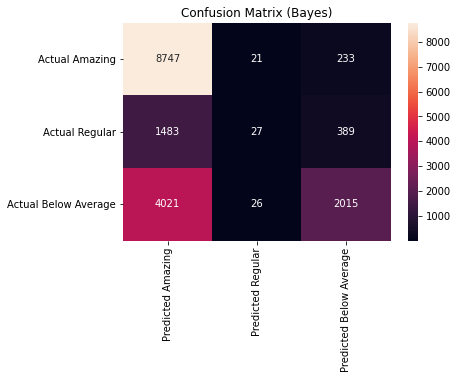

In [ ]:
import seaborn as sns
x_axis_labels = ["Predicted Amazing","Predicted Regular","Predicted Below Average"]
y_axis_labels = ["Actual Amazing","Actual Regular","Actual Below Average"]
ax = plt.axes()
sns.heatmap(cm_test,xticklabels=x_axis_labels,yticklabels=y_axis_labels,annot=True,fmt='d',ax=ax)
ax.set_title('Confusion Matrix (Bayes)')
plt.show()

NAIVE BAYES (stem_sn)

In [ ]:
from sklearn.naive_bayes import MultinomialNB
model = MultinomialNB()
model.fit(tv_train_sn,train_s)
labels_sn = model.predict(tv_test_sn)

from sklearn.metrics import accuracy_score
acc_sn = accuracy_score(test_s,labels_sn, normalize=True) * float(100)
print('\n****Test accuracy is',(acc_sn))


****Test accuracy is 64.7624100931494


In [ ]:
from sklearn.metrics import confusion_matrix
cm_test_sn = confusion_matrix(test_s,labels_sn)
cm_test_sn

array([[8715,   29,  257],
       [1443,   39,  417],
       [3804,   27, 2231]])

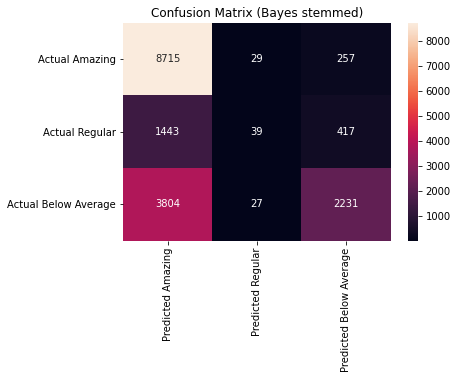

In [ ]:
import seaborn as sns
x_axis_labels = ["Predicted Amazing","Predicted Regular","Predicted Below Average"]
y_axis_labels = ["Actual Amazing","Actual Regular","Actual Below Average"]
ax = plt.axes()
sns.heatmap(cm_test_sn,xticklabels=x_axis_labels,yticklabels=y_axis_labels,annot=True,fmt='d',ax=ax)
ax.set_title('Confusion Matrix (Bayes stemmed)')
plt.show()

SVM(comments)

In [ ]:
from sklearn import svm
SVM = svm.SVC(C=1.0, kernel='linear', degree=3, gamma='auto')
SVM.fit(tv_train,train_s)
# predict the labels on test dataset
predictions_SVM = SVM.predict(tv_test)

In [ ]:
# Use accuracy_score function to get the accuracy
from sklearn.metrics import accuracy_score
print("SVM Accuracy Score -> ",accuracy_score(predictions_SVM, test_s)*100)

SVM Accuracy Score ->  70.74637424831978


**SVM**(stem_sn)

In [ ]:
from sklearn import svm
SVM = svm.SVC(C=1.0, kernel='linear', degree=3, gamma='auto')
SVM.fit(tv_train_sn,train_s)
# predict the labels on validation dataset
predictions_SVM_sn = SVM.predict(tv_test_sn)

In [ ]:
# Use accuracy_score function to get the accuracy
print("SVM Accuracy Score_sn -> ",accuracy_score(predictions_SVM_sn, test_s)*100)

SVM Accuracy Score_sn ->  71.2592854616201


In [ ]:
review['neighbourhood_group_cleansed'].value_counts()

Other neighborhoods    17199
Downtown               12602
Capitol Hill           12407
Central Area            8437
Ballard                 7118
Queen Anne              6611
Rainier Valley          4084
West Seattle            3404
Beacon Hill             3355
Delridge                2196
Cascade                 1419
Northgate               1387
University District     1313
Seward Park             1195
Lake City               1027
Magnolia                 933
Interbay                 123
Name: neighbourhood_group_cleansed, dtype: int64

(array([ 6611.,  8437.,  1419., 17199., 12407.,  7118.,  2196., 12602.,
         3404.,  1313.,  1195.,  3355.,  1387.,   123.,  4084.,  1027.,
          933.]),
 array([ 0.        ,  0.94117647,  1.88235294,  2.82352941,  3.76470588,
         4.70588235,  5.64705882,  6.58823529,  7.52941176,  8.47058824,
         9.41176471, 10.35294118, 11.29411765, 12.23529412, 13.17647059,
        14.11764706, 15.05882353, 16.        ]),
 <a list of 17 Patch objects>)

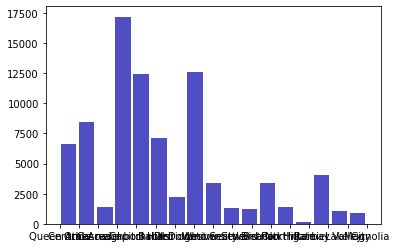

In [ ]:
plt.hist(review['neighbourhood_group_cleansed'], bins=17, color='#0504aa',alpha=0.7, rwidth=0.85)